<a href="https://colab.research.google.com/github/jdshanbj/cnblogs/blob/master/%E2%80%9C1_explore_hw_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment: Exploratory data analysis
=====================================

**TODO**: Edit this cell to fill in your NYU Net ID and your name:

-   **Net ID**:yw5458
-   **Name**:Yifan Wang

Introduction
------------

In this assignment, we will practice using exploratory data analysis on
Google’s COVID-19 Community Mobility data.

This data was collected from Google Maps users around the world over the
last few months - including you, *if* you have Google Maps on your phone
and have turned on the Location History setting. It combines location
history from a large number of users to capture the overall increase or
decrease in time spent in places such as: retail and recreation
facilities, groceries and pharmacies, parks, transit stations,
workplaces, and residences.

As you work through this notebook, you will see that some text and code
cells are marked with a “TODO” at the top. You’ll have to edit these
cells to fill in the code or answer the questions as indicated.

Learn about the data
--------------------

First, it is worthwhile to learn more about the data: how it is
collected, what is included, how Google gets consent to collect this
data, and how user privacy is protected. Google provides several
resources for learning about the data:

-   [Blog
    post](https://www.blog.google/technology/health/covid-19-community-mobility-reports?hl=en)
-   [About this
    data](https://www.google.com/covid19/mobility/data_documentation.html?hl=en#about-this-data)
-   [Understand the
    data](https://support.google.com/covid19-mobility/answer/9825414?hl=en&ref_topic=9822927)

Read in data
------------

Now you are ready to read the data into your notebook.

Visit Google’s web page for the [COVID-19 Community
Mobility](https://www.google.com/covid19/mobility/) project to get the
URL for the data.

(Specific instructions will depend on your browser and operating system,
but on my laptop, I can get the URL by right-clicking on the button that
says “Download global CSV” and choosing “Copy Link Address”.)

Then, in the following cells, use that URL to read the data into a
pandas Data Frame called `df`. (You can follow the example in the
“Exploratory data analysis” notebook from this week’s lesson.)

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# TODO Q1
url = 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv?cachebust=31928890d4c9fde9'
df = pd.read_csv(url)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Use the `info()` and `head()` functions to show some basic information
about the data and to look at the first few samples.

In [19]:
# TODO Q2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547922 entries, 0 to 547921
Data columns (total 13 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 546981 non-null  object 
 1   country_region                                      547922 non-null  object 
 2   sub_region_1                                        531587 non-null  object 
 3   sub_region_2                                        316625 non-null  object 
 4   iso_3166_2_code                                     198752 non-null  object 
 5   census_fips_code                                    316746 non-null  float64
 6   date                                                547922 non-null  object 
 7   retail_and_recreation_percent_change_from_baseline  423131 non-null  float64
 8   grocery_and_pharmacy_percent_change_from_baseline   406061 non-n

In [20]:
# TODO Q3
df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


Basic data manipulations
------------------------

The data includes a date field, but it may have been read in as a
string, rather than as a `datetime`. If that’s the case, use
`to_datetime()` to convert the field into a datetime format. (You can
follow the example in the “Exploratory data analysis” notebook from this
week’s lesson.)

Then, use `info()` again to make sure your change was applied. Note the
difference in the output, relative to the cell above.

In [22]:
# TODO Q4
df['date'] = pd.to_datetime(df['date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547922 entries, 0 to 547921
Data columns (total 13 columns):
 #   Column                                              Non-Null Count   Dtype         
---  ------                                              --------------   -----         
 0   country_region_code                                 546981 non-null  object        
 1   country_region                                      547922 non-null  object        
 2   sub_region_1                                        531587 non-null  object        
 3   sub_region_2                                        316625 non-null  object        
 4   iso_3166_2_code                                     198752 non-null  object        
 5   census_fips_code                                    316746 non-null  float64       
 6   date                                                547922 non-null  datetime64[ns]
 7   retail_and_recreation_percent_change_from_baseline  423131 non-null  float64       

Next, you are going to extract the subset of data for the location of
your choice. You can choose any location *except* Brooklyn, New York.
(You can’t choose Brooklyn because the example code I’m about to show
you is for Brooklyn.)

The data is reported for different regions, with different levels of
granularity available. This is best explained by example:

Suppose I want the overall trend from the entire U.S. I would use the
subset of data where `country_region` is equal to “United States” and
`sub_region_1` is null:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].isnull())]

Suppose I want the overall trend from the entire state of New York: I
would use the subset of data where `country_region` is equal to “United
States”, `sub_region_1` is equal to “New York”, and `sub_region_2` is
null:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].eq("New York")) & (df['sub_region_2'].isnull())]

Suppose I want the overall trend from Brooklyn, New York (Kings County):
I would use the subset of data where `country_region` is equal to
“United States”, `sub_region_1` is equal to “New York”, and
`sub_region_2` is equal to “Kings County”:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].eq("New York")) & (df['sub_region_2'].eq("Kings County"))]

In the following cell(s), fill in the code to create a data frame
`df_subset` with data from a single location. You can go down to the
`sub_region_1` level or the `sub_region_2` level - depending on the
location you chose, the finer level of granularity may not be available.

In [28]:
# TODO Q5
# I'd like to choose Germany Berlin
df_subset = df[(df['country_region'].eq("Germany")) & (df['sub_region_1'].eq("Berlin")) & (df['sub_region_2'].isnull())]

Is the data complete, or is some data not available for the location you
have chosen? In the following cell, write code to check for missing data
in the `...percent_change_from_baseline` fields.

In [30]:
# TODO Q6
df_subset_miss = df_subset[(df['retail_and_recreation_percent_change_from_baseline'].isnull() | df['grocery_and_pharmacy_percent_change_from_baseline'].isnull() | df['parks_percent_change_from_baseline'].isnull() | df['transit_stations_percent_change_from_baseline'].isnull() | df['workplaces_percent_change_from_baseline'].isnull() | df['residential_percent_change_from_baseline'].isnull())]
df_subset_miss.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
36586,DE,Germany,Berlin,NaN,DE-BE,NaN,2020-04-19,-68.0,NaN,38.0,-50.0,-23.0,7.0
36593,DE,Germany,Berlin,NaN,DE-BE,NaN,2020-04-26,-65.0,NaN,40.0,-47.0,-20.0,6.0
36600,DE,Germany,Berlin,NaN,DE-BE,NaN,2020-05-03,-70.0,NaN,12.0,-48.0,-21.0,7.0


**TODO** Q7: Edit this cell to answer the following question: Is the
data complete, or is some relevant data missing? Why would some
locations only have partial data available (missing some
`...percent_change_from_baseline` fields for some dates)? **Include a
short quote from the material you read in the “Learn about the data”
section to answer this question.**

**Answer:** There is some relevant data missing. There is might be some data missing because "the data doesn’t meet the quality and privacy threshold—when there isn’t enough data to ensure anonymity".(quote from https://support.google.com/covid19-mobility/answer/9825414?hl=en&ref_topic=9822927)

For this data, the `date` field is important, but we don’t necessarily
care about the absolute date. Instead, we care about how many days have
elapsed since the first confirmed case of COVID-19 in this location, how
many days have elapsed since a “stay at home” order or similar rule was
established in this location (if there was one) and how many days have
elapsed since it was lifted (if applicable).

For example, in Brooklyn, New York, I might compute:

    days_since_lockdown = (df_subset['date'] - pd.to_datetime('2020-03-20 00:00:00')).dt.days.values
    # NYC lockdown March 20, 2020 https://www.nytimes.com/2020/03/20/us/coronavirus-today.html

Compute “days since \[some relevant COVID-19 date\]” for your location.
In a comment, explain the significance of the date you have chosen, and
include a link to a news article or other reference supporting the
significance of the date. (The news article does not have to be in
English.)

In [35]:
# TODO Q8

days_since_lockdown = (df_subset['date'] - pd.to_datetime('2020-03-20 00:00:00')).dt.days.values
# data comes from https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Germany .This data shows when did the German government take actions 
# and can help us get to know how people treat to the lockdown.



Visualize data
--------------

Finally, we are going to visualize the changes in human mobility over
this time, for the location you have chosen.

In the following cell, create a figure with six subplots, arranged
vertically. (You can refer to the example in the “Python + numpy”
notebook from this week’s lesson.) On the horizontal axis, put the
`days_since...` array you computed in the previous cell. On the vertical
axes, show:

-   `retail_and_recreation_percent_change_from_baseline` in the top
    subplot
-   `grocery_and_pharmacy_percent_change_from_baseline` in the next
    subplot
-   `parks_percent_change_from_baseline` in the next subplot
-   `transit_stations_percent_change_from_baseline` in the next subplot
-   `workplaces_percent_change_from_baseline` in the next subplot
-   `residential_percent_change_from_baseline` in the bottom subplot

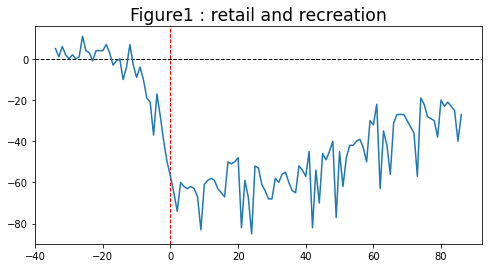

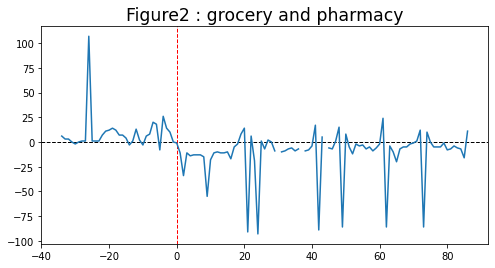

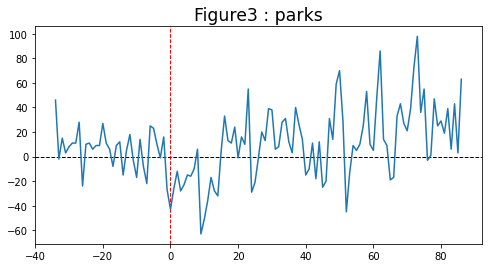

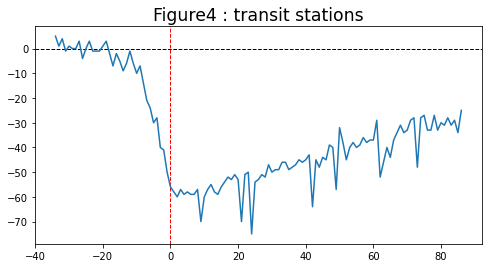

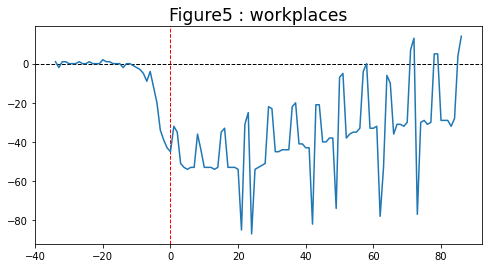

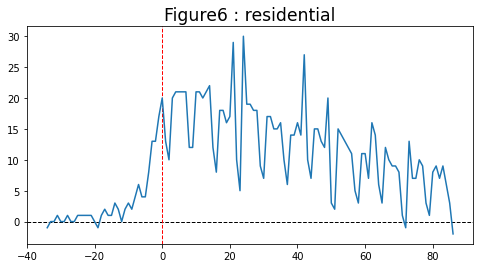

In [68]:
# TODO Q9

figure1 = plt.figure(num=1,figsize=(8, 4))
plt.axhline(y=0.0, c="black",ls = '--', lw=1)
plt.axvline(x=0.0, c="r",ls = '--', lw=1)
plt.plot(days_since_lockdown , df_subset['retail_and_recreation_percent_change_from_baseline'])
plt.title('Figure1 : retail and recreation',fontsize = 'xx-large')

figure2 = plt.figure(num=2,figsize=(8, 4))
plt.axhline(y=0.0, c="black",ls = '--', lw=1)
plt.axvline(x=0.0, c="r",ls = '--', lw=1)
plt.plot(days_since_lockdown , df_subset['grocery_and_pharmacy_percent_change_from_baseline'])
plt.title('Figure2 : grocery and pharmacy',fontsize = 'xx-large')
figure3 = plt.figure(num=3,figsize=(8, 4))
plt.axhline(y=0.0, c="black",ls = '--', lw=1)
plt.axvline(x=0.0, c="r",ls = '--', lw=1)
plt.plot(days_since_lockdown , df_subset['parks_percent_change_from_baseline'])
plt.title('Figure3 : parks',fontsize = 'xx-large')
figure4 = plt.figure(num=4,figsize=(8, 4))
plt.axhline(y=0.0, c="black",ls = '--', lw=1)
plt.axvline(x=0.0, c="r",ls = '--', lw=1)
plt.plot(days_since_lockdown , df_subset['transit_stations_percent_change_from_baseline'])
plt.title('Figure4 : transit stations',fontsize = 'xx-large')
figure5 = plt.figure(num=5,figsize=(8, 4))
plt.axhline(y=0.0, c="black",ls = '--', lw=1)
plt.axvline(x=0.0, c="red",ls = '--', lw=1)
plt.plot(days_since_lockdown , df_subset['workplaces_percent_change_from_baseline'])
plt.title('Figure5 : workplaces',fontsize = 'xx-large')
figure6 = plt.figure(num=6,figsize=(8, 4))
plt.axhline(y=0.0, c="black",ls = '--', lw=1)
plt.axvline(x=0.0, c="red",ls = '--', lw=1)
plt.plot(days_since_lockdown , df_subset['residential_percent_change_from_baseline'])
plt.title('Figure6 : residential',fontsize = 'xx-large')
plt.show()



**TODO** Q10: Answer the following question: Do the results seem to
satisfy “common sense”? Explain, citing specific data from your plot to
support your answer.

**Answer:**Yes, these results are totally satisfied with the common sense. Since the lockdown data is represented as 0 in these plots, we can see some immediate changes since that day. 

Fist of all, we can acknowledge that the retail and recreation decreased just before the lockdown day which means the situation was becoming worse and worse and people prefered staying at home rather than outside.

Secondly, the grocery and pharmacy didn't change a lot, because people were still allowed to buy these neccessities.

Thirdly, the people who went to the park increased since there were many people disobeying the lockdown order and went out for walk time by time. We can also see this phenomenon in many other countries.

In figure four and five, it makes sense that the lockdown especially lockdown the transportation system and prevent people from working in their companies.

Finally, the lockdown action of course asked residents to stay at home rather than going around.

**TODO** Q11: In the [Calibrate
Region](https://support.google.com/covid19-mobility/checklist/9834261?hl=en&ref_topic=9822927)
checklist, Google suggests a number of reasons why the data might *not*
be useful for understanding the effect of COVID-19-related lockdowns, or
why the data might be misleading. For the location you have chosen,
briefly answer all of the questions in that checklist. Based on your
answers, do you think there are any serious problems associated with
using this data for understanding user mobility changes due to COVID-19?

**Answer:**

*question 1*:There are not some big changes these days(Jan 3rd to Feb 6th).

*question 2*:People are not effected by the Covid-19 at the first time even the government appealed people to stay at home later. In the normal day, the number of prople tend to increase since the temperature are increasing and the climate in spring is suitable for snake or traveling. While in the raining day, the number might be lower but won't change a lot.

*question 3*:the working hours will only increase upon nurses and doctors who are working in the hospitals. Children were asked to take the courses online and many people worked at home remotely.Thus, the time people stay at residential places are pretty long. What;s more, since children and adults were all staying at home, there is no need to consider the season reason.

*question 4*:
different jobs should be effected differently. Almost every jobs were greatly effected by COVID-19 except for jobs in the hospital, tao-out riders and some staff in the neccessities shops. The effect for weekday workers wouldn't be that different from weekend workers since both of them can't work outside. Of course the effect for weekend workers might be higher since their work are mostly part-time jobs or based on tourists and the COVID-19 had a serious effect on these factors.

*question 5*:There are very few places of interests in my region. But all of them were closed after the lockdown order given by the government. There are no such places that don;t allow mobile devices.